In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/db
Income Response


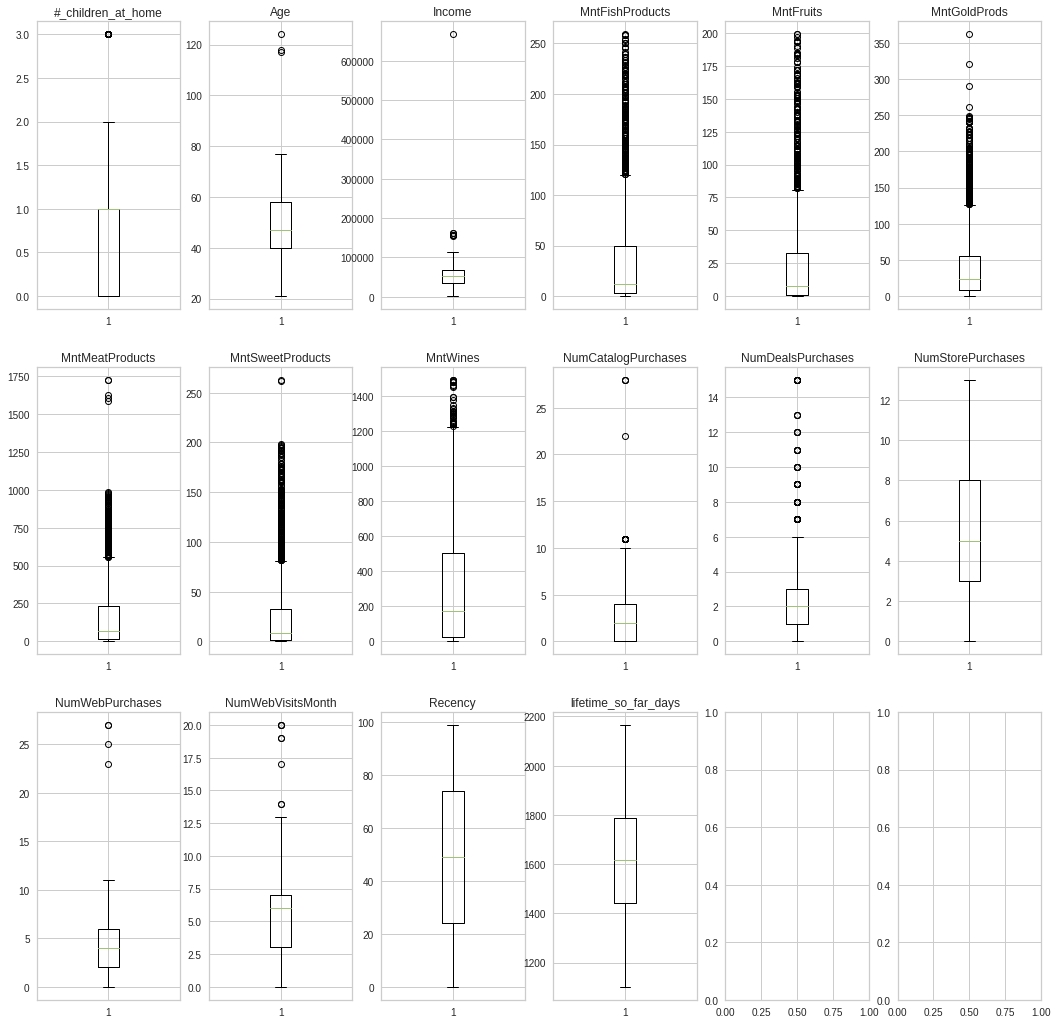

Ready
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1 to 2240
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           2240 non-null   float64
 1   Recency                          2240 non-null   int32  
 2   MntWines                         2240 non-null   float64
 3   MntFruits                        2240 non-null   float64
 4   MntMeatProducts                  2240 non-null   float64
 5   MntFishProducts                  2240 non-null   float64
 6   MntSweetProducts                 2240 non-null   float64
 7   MntGoldProds                     2240 non-null   float64
 8   NumDealsPurchases                2240 non-null   int32  
 9   NumWebPurchases                  2240 non-null   int32  
 10  NumCatalogPurchases              2240 non-null   int32  
 11  NumStorePurchases                2240 non-null   int32  
 12  NumWebVisitsMo

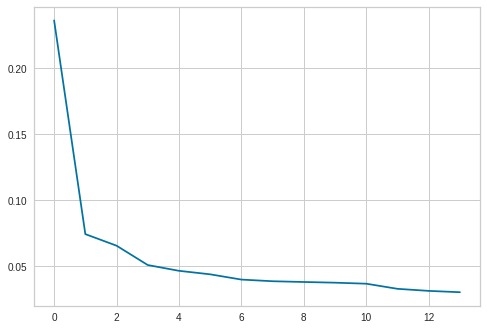

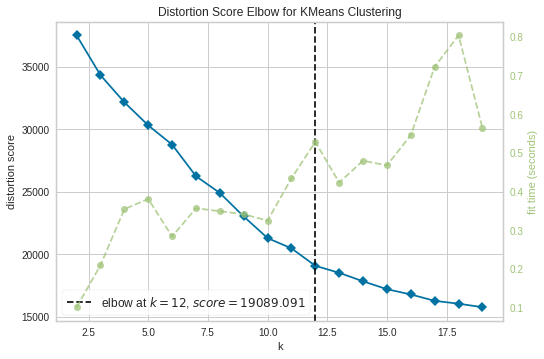

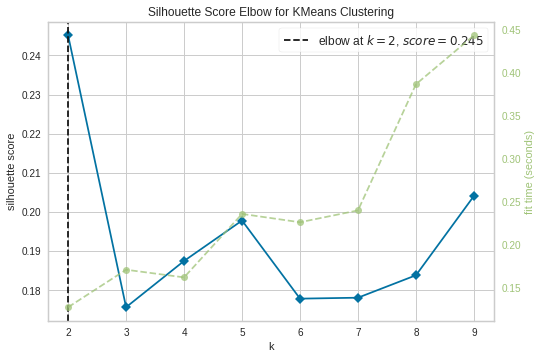

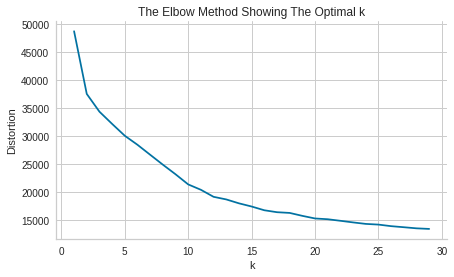

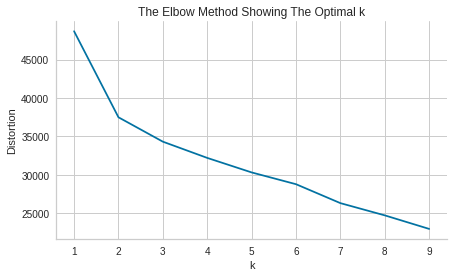

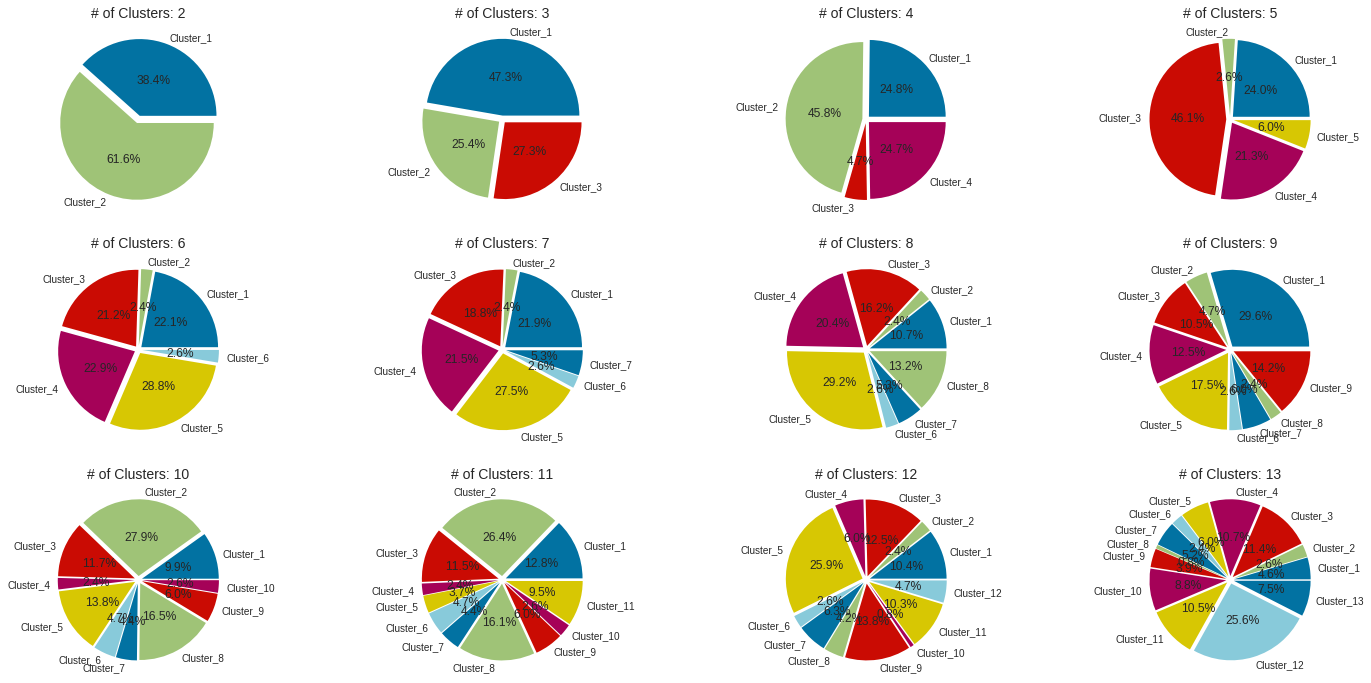

In [2]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/3.-Standardization, PCA & K_Means.ipynb'

General settings

In [3]:
mk = mk.astype({'clusters':'category','#_children_at_home':'category','Promotion_#_campaign_accepted':'category'})
mk = mk.sort_values('clusters')
colors= ['#7497ED','#EE4C87','#38E542']
sns_colors = {0:'#7497ED', 1:'#EE4C87', 2:'#38E542'}
labels1=['Cluster 1', 'Cluster 2', 'Cluster 3']
labels2=['1', '2', '3']

### **General view of the cluster´s universe**

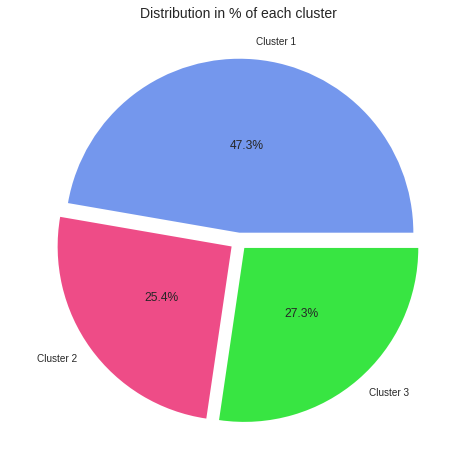

In [4]:
plt.subplots(1, 1, figsize=(8,8))

data = mk.groupby("clusters")['Income'].count()
g1 = data.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[] )
g1.set_title("Distribution in % of each cluster", fontsize=14)
g1.set_ylabel(' ')

plt.show()

### **General characteristics of the population**

Let´s start to analyze the characteristics of each cluster

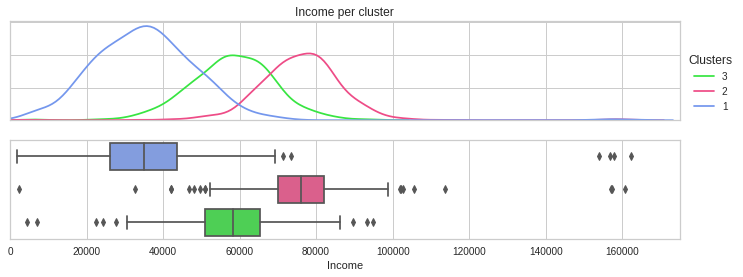

In [5]:
# Income distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g1 = sns.kdeplot(mk['Income'],hue=mk['clusters'],palette= sns_colors ,ax = ax[0])
g1.set(yticklabels=[], xticklabels=[], title='Income per cluster', ylabel=None, xlabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_xlim(0,175000)

g2= sns.boxplot(data=mk, x='Income', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=[], ylabel=None)
ax[1].set_xlim(0,175000)
plt.show()

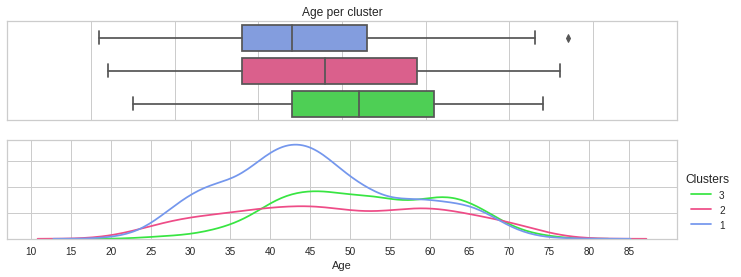

In [6]:
# Age distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g2= sns.boxplot(data=mk, x='Age', y= 'clusters',palette= sns_colors, ax = ax[0])
g2.set(yticklabels=[], xticklabels=[], title='Age per cluster', ylabel=None, xlabel=None)
ax[0].set_xlim(10,90)

g1 = sns.kdeplot(mk['Age'],hue=mk['clusters'],palette= sns_colors,ax = ax[1])
g1.set(yticklabels=[], ylabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(range(10, 90, 5))
plt.show()

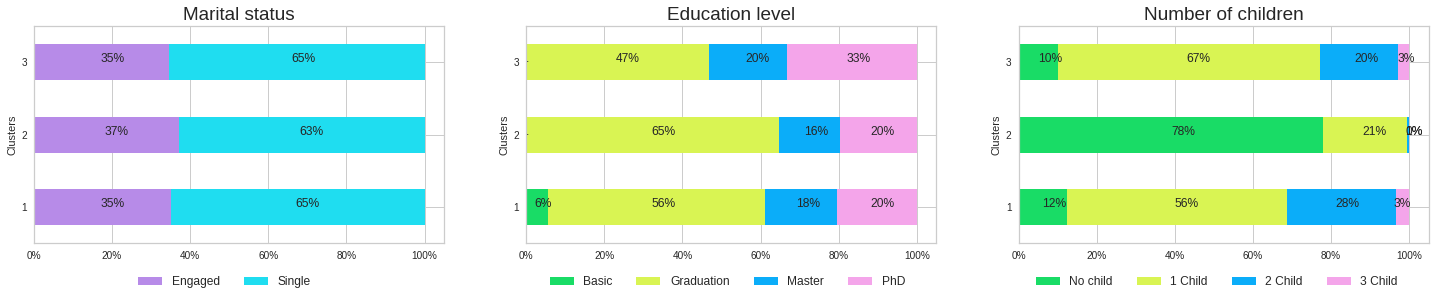

In [7]:
# Material status & Education level & number of childen in each cluster:

# Marital status: generating the dataframe:
status= pd.DataFrame(mk.groupby(['clusters','Marital_Status'])[['Education']].count()).reset_index()
status = status.pivot_table(values='Education', index='clusters', columns='Marital_Status').reset_index()

# Education level: generating the dataframe:
education = pd.DataFrame(mkd.groupby('clusters')[['Education_Basic','Education_Graduation','Education_Master','Education_PhD']].sum()).reset_index()

# Number of children:
children = pd.DataFrame(mk.groupby(['clusters','#_children_at_home'])[['Education']].count()).reset_index()
children = children.pivot_table(values='Education', index='clusters', columns='#_children_at_home').reset_index()

# Generating the graph:
fig, ax = plt.subplots(1,3, figsize=(25,4))
ax = ax.ravel()

barh_100_per(status, num_charts='several', axes=0, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Engaged','Single'], color=['#B78BE8','#1FDDF0'],
             title='Marital status', titlefs=19, bbox_position= [0.75, 0], labelfs=12, box_ncol=500)

barh_100_per(education, num_charts='several',axes=1, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Basic','Graduation','Master','PhD'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Education level', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)

barh_100_per(children, num_charts='several',axes=2, yticklabels=['1','2','3'], ylabel='Clusters', labels=['No child','1 Child','2 Child','3 Child'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Number of children', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)



plt.show()

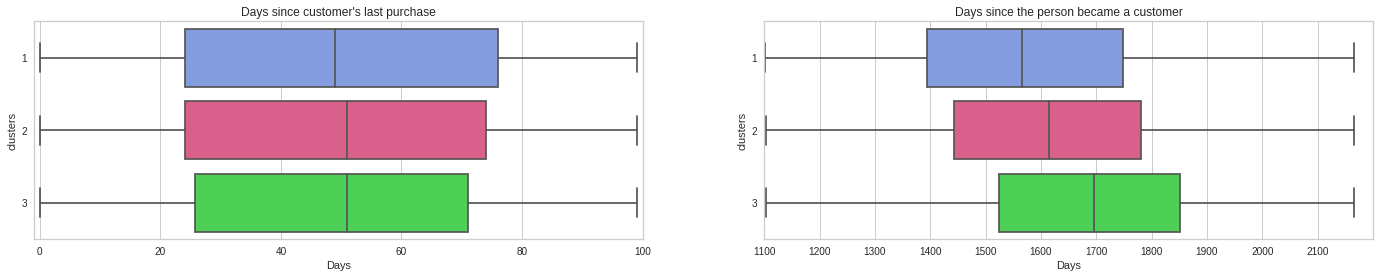

In [8]:
# Number of days since customer's last purchase
fig, ax = plt.subplots(1, 2, figsize=(24,4))
ax = ax.ravel()

g1= sns.boxplot(data=mk, x='Recency', y= 'clusters',palette= sns_colors, ax = ax[0])
g1.set(yticklabels=['1','2','3'], title='Days since customer\'s last purchase', xlabel='Days')
ax[0].set_xlim(-1,100)

# Number of days that have passed since the person started to be a customer´s company.
g2= sns.boxplot(data=mk, x='lifetime_so_far_days', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=['1','2','3'], title='Days since the person became a customer', xlabel='Days')
ax[1].set_xlim(1100,2200)
plt.xticks(range(1100,2200, 100))

plt.show()

### **Product categories by cluster (Expenditure in the last 2 years)**

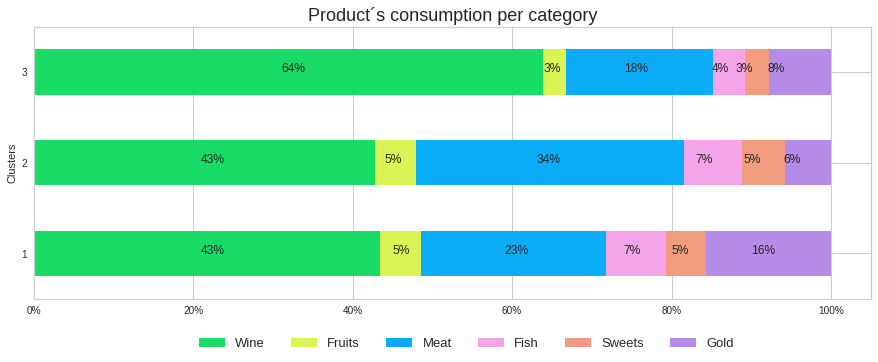

In [9]:
products = pd.DataFrame(mkd.groupby('clusters')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()).reset_index()
barh_100_per(products, yticklabels=['1','2','3'], fig_length=15,fig_width=5, ylabel='Clusters', labels=['Wine','Fruits','Meat','Fish','Sweets','Gold'], 
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='Product´s consumption per category', titlefs=18, 
             bbox_position= [0.9, 0], labelfs=13, box_ncol=500)


### **Promotion: Reaction to the campaigns**

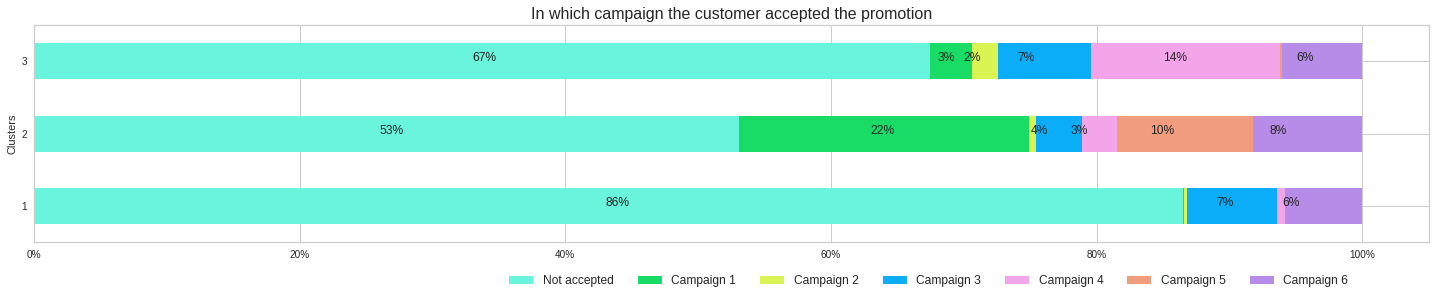

In [21]:
campaign = pd.DataFrame(mk.groupby(['clusters','Promotion_#_campaign_accepted'])[['Education']].count()).reset_index()
campaign = campaign.pivot_table(values='Education', index='clusters', columns='Promotion_#_campaign_accepted').reset_index()
barh_100_per(campaign, yticklabels=['1','2','3'], fig_length=25,fig_width=4, ylabel='Clusters', labels=['Not accepted','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Campaign 6'], 
             color=['#68F4DD','#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='In which campaign the customer accepted the promotion', titlefs=16, 
             bbox_position= [1, 0], labelfs=12, box_ncol=7)

In [11]:
campaign1 = pd.DataFrame(mkd.groupby('clusters')[['Promotion_#_campaign_accepted_1','Promotion_#_campaign_accepted_2','Promotion_#_campaign_accepted_3',
                                                 'Promotion_#_campaign_accepted_4','Promotion_#_campaign_accepted_5','Promotion_#_campaign_accepted_6']].sum()).reset_index()

In [12]:
campaign

Promotion_#_campaign_accepted,clusters,0,1,2,3,4,5,6
0,0,916,1,2,72,6,0,62
1,1,302,124,3,20,15,58,47
2,2,413,19,12,43,87,1,37


In [28]:
def barh_100_per(dataset, num_charts='one',axes=0,fig_length=11,fig_width=5, yticklabels=None, ylabel=None, labels=None, color=None, title=None,
                 titlefs=18, bbox_dimension= [-0.05, -0.1], bbox_position= [0.7, 0], labelfs=12, info=None, box_ncol=500):
  h='''R'''
  if info==None:
    columns=list(dataset.columns)
    for column in columns:
      dataset=dataset.astype({column:'int64'})
    dataset['Total'] = dataset.iloc[::,1::].sum(axis=1)
    dataset1= dataset.iloc[::,1:-1].apply(lambda x: (x/dataset.Total)*100)
    dataset1 = dataset1.reset_index()
    m = dataset1.set_index('index')
    gl=[]
    xl=[]
    yl=[]
    sl=[]
    s1l=[]
    for i in m.index:
      for k in m.columns:
        a = m.loc[i,[k]].values
        y= i
        s= str(round(float(a)))+'%'
        s1 = round(float(a))
        if (len(xl)== 0):
          x= float(a/2)
          g= float(a)
        elif y==yl[-1]:
          g= float(a) + float(gl[-1])
          x= float(float(a/2)+float(gl[-1]))
        else:
          g= float(a)
          x= float(a/2)
        xl.append(x)
        yl.append(y)
        sl.append(s)
        gl.append(g)
        s1l.append(s1)

    # Conditionals:
    if yticklabels == None:
      yticklabels=list(dataset.iloc[::,0])
    else:
      yticklabels == yticklabels

    if ylabel==None:
      ylabel= list(dataset.columns)[0]
    else:
      ylabel= ylabel
    
    if labels == None:
      labels= list(m.columns)
    else:
      label=labels
    
    if color == None:
      color= None
    else:
      color=color
    
    if title == None:
      title= list(dataset.columns)[0]
    else:
      title= title
    
    if box_ncol == 500:
      box_ncol==len(m.columns)
    else:
      box_ncol==box_ncol

    if num_charts=='one':
      g1 = dataset1.plot.barh(x='index', stacked=True, color=color, legend=[], figsize=(fig_length,fig_width))
      g1.set(yticklabels=yticklabels, ylabel=ylabel, xlabel=None)
      g1.set_title(title, fontsize=titlefs)
      for x,y,s,s1 in zip(xl,yl,sl,s1l):
        if x == 0 or s1<=1:
          g1.text(x= x,y=y,s='')
        else:
          g1.text(x= x,y=y,s=s)
      fmt = '%.0f%%' 
      xticks = mtick.FormatStrFormatter(fmt)
      g1.xaxis.set_major_formatter(xticks)
      g1.legend(labels=labels, ncol = box_ncol, bbox_to_anchor=(bbox_dimension[0], bbox_dimension[1], bbox_position[0], bbox_position[1]),
                fancybox=True, shadow=True, fontsize=labelfs)
    else:
      g1 = dataset1.plot.barh(x='index', stacked=True, color=color, legend=[],ax= ax[axes])
      g1.set(yticklabels=yticklabels, ylabel=ylabel, xlabel=None)
      g1.set_title(title, fontsize=titlefs)
      for x,y,s,s1 in zip(xl,yl,sl,s1l):
        if x == 0 or s1<=1:
          g1.text(x= x,y=y,s='   ')
        else:
          g1.text(x= x,y=y,s=s)
      fmt = '%.0f%%' 
      xticks = mtick.FormatStrFormatter(fmt)
      g1.xaxis.set_major_formatter(xticks)
      g1.legend(labels=labels, ncol = box_ncol, bbox_to_anchor=(bbox_dimension[0], bbox_dimension[1], bbox_position[0], bbox_position[1]),
                fancybox=True, shadow=True, fontsize=labelfs)
    print(gl)
    print(xl)
    print(yl)
    print(sl)
    print(s1l)
    return g1
  else:
    print(h)

[86.49669499527857, 86.5911237016053, 86.77998111425875, 93.57884796978283, 94.14542020774317, 94.14542020774317, 100.00000000000001, 53.075571177504386, 74.86818980667837, 75.39543057996484, 78.91036906854129, 81.54657293497363, 91.73989455184532, 99.99999999999999, 67.48366013071896, 70.58823529411765, 72.54901960784314, 79.57516339869281, 93.79084967320262, 93.95424836601308, 100.0]
[43.24834749763929, 86.54390934844193, 86.68555240793202, 90.17941454202078, 93.862134088763, 94.14542020774317, 97.0727101038716, 26.537785588752193, 63.97188049209138, 75.13181019332161, 77.15289982425307, 80.22847100175746, 86.64323374340948, 95.86994727592266, 33.74183006535948, 69.0359477124183, 71.5686274509804, 76.06209150326796, 86.68300653594771, 93.87254901960785, 96.97712418300654]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
['86%', '0%', '0%', '7%', '1%', '0%', '6%', '53%', '22%', '1%', '4%', '3%', '10%', '8%', '67%', '3%', '2%', '7%', '14%', '0%', '6%']
[86, 0, 0, 7, 1, 0

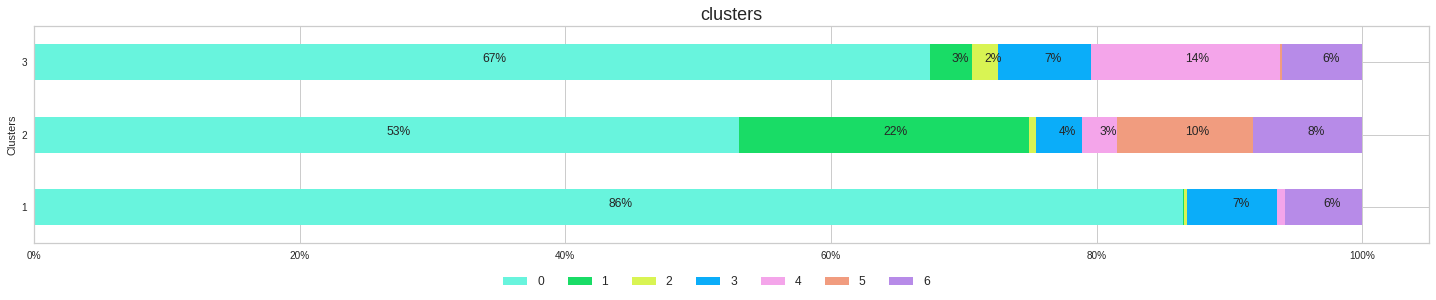

In [29]:
status= pd.DataFrame(mk.groupby(['clusters','Marital_Status'])[['Education']].count()).reset_index()
status = status.pivot_table(values='Education', index='clusters', columns='Marital_Status').reset_index()

# products
products = pd.DataFrame(mkd.groupby('clusters')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()).reset_index()

# campaign
campaign = pd.DataFrame(mk.groupby(['clusters','Promotion_#_campaign_accepted'])[['Education']].count()).reset_index()
campaign = campaign.pivot_table(values='Education', index='clusters', columns='Promotion_#_campaign_accepted').reset_index()

# Generating the graph:
# fig, ax = plt.subplots(2,1, figsize=(25,6))
# ax = ax.ravel()

# barh_100_per(products,num_charts='several',axes=0, yticklabels=['1','2','3'], ylabel='Clusters',
#              color=['#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'])

barh_100_per(campaign,num_charts='one', yticklabels=['1','2','3'], ylabel='Clusters',fig_length=25,fig_width=4,  
             color=['#68F4DD','#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'])

In [18]:
dataset= campaign
columns=list(dataset.columns)
for column in columns:
  dataset=dataset.astype({column:'int64'})
dataset['Total'] = dataset.iloc[::,1::].sum(axis=1)
dataset1= dataset.iloc[::,1:-1].apply(lambda x: (x/dataset.Total)*100)
dataset1 = dataset1.reset_index()
m = dataset1.set_index('index')
m

Promotion_#_campaign_accepted,0,1,2,3,4,5,6
index,,,,,,,
0,86.5,0.1,0.2,6.8,0.6,0.0,5.9
1,53.1,21.8,0.5,3.5,2.6,10.2,8.3
2,67.5,3.1,2.0,7.0,14.2,0.2,6.0
